In [1]:
# · M_f – DDF factor (melt_f): apply change [-2, +2] mm/(°C day)
# · T_b – temperature bias (temp_bias): apply change [-5, +5] °C
# · P_f – precipitation scaling factor (prcp_fac): apply scaling [0.5,2]
# · T_melt – Melt threshold (temp_melt): apply change [-3, +3] °C
# · A – ice creep parameter: apply scaling [0.2,5] 


# P_f: precipitation scaling factor, multiplicative. Range: 0.5 - 2 (log scaling)
# M_f: default degree-day factor, additive. Range: +/- 2
# T_b: temperature bias, additive: Range: +/- 5
# A: ice creep parameter, multiplicative. Range: 0.2 - 5 (log scaling)
# T_melt, monthly mean temperature above which melt is supposed to occur, additive. Range: -3 - 3

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
from scipy.stats import qmc
sampler = qmc.LatinHypercube(d=5)
sample = sampler.random(n=300)

In [27]:
sample.shape

(300, 5)

In [28]:
def log_scale_value(value, low, high):
    return 2**((np.log2(high) - np.log2(low))*value + np.log2(low))

In [29]:
sample[:,0] = 4*sample[:,0] - 2  # DDF factor (melt_f): apply change [-2, +2] mm/(°C day)
sample[:,1] = 5*sample[:,1] - 2.5  # temperature bias (temp_bias): apply change [-5, +5] °C
sample[:,2] = log_scale_value(sample[:,2], 0.5, 2)  # precipitation scaling factor (prcp_fac): apply scaling [0.5,2] on log2
sample[:,3] = 6*sample[:,3] - 3   # Melt threshold (temp_melt): apply change [-3, +3] °C
sample[:,4] = log_scale_value(sample[:,4], 0.2, 5)  # A – ice creep parameter: apply scaling [0.2,5] on log2

In [30]:
df = pd.DataFrame(sample, columns=['melt_f', 'temp_bias', 'prcp_fac', 'temp_melt', 'glen_a'])

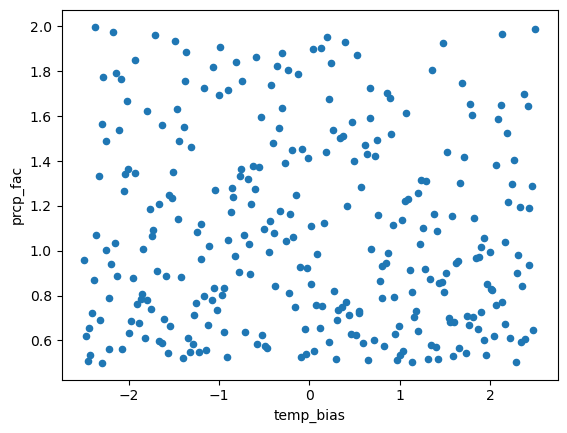

In [31]:
df.plot.scatter(x='temp_bias', y='prcp_fac');

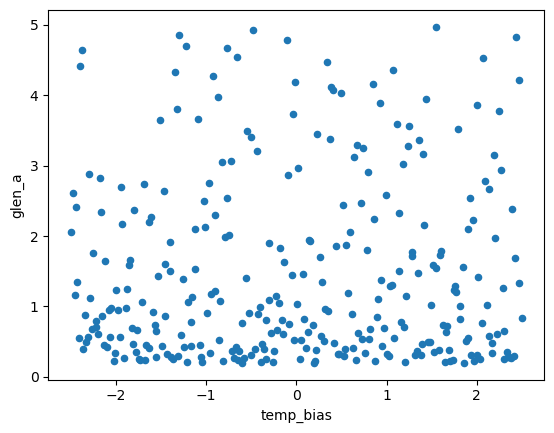

In [32]:
df.plot.scatter(x='temp_bias', y='glen_a');

In [33]:
len(df.loc[df.glen_a < 1]), len(df.loc[df.glen_a > 1])

(150, 150)

In [34]:
import seaborn as sns

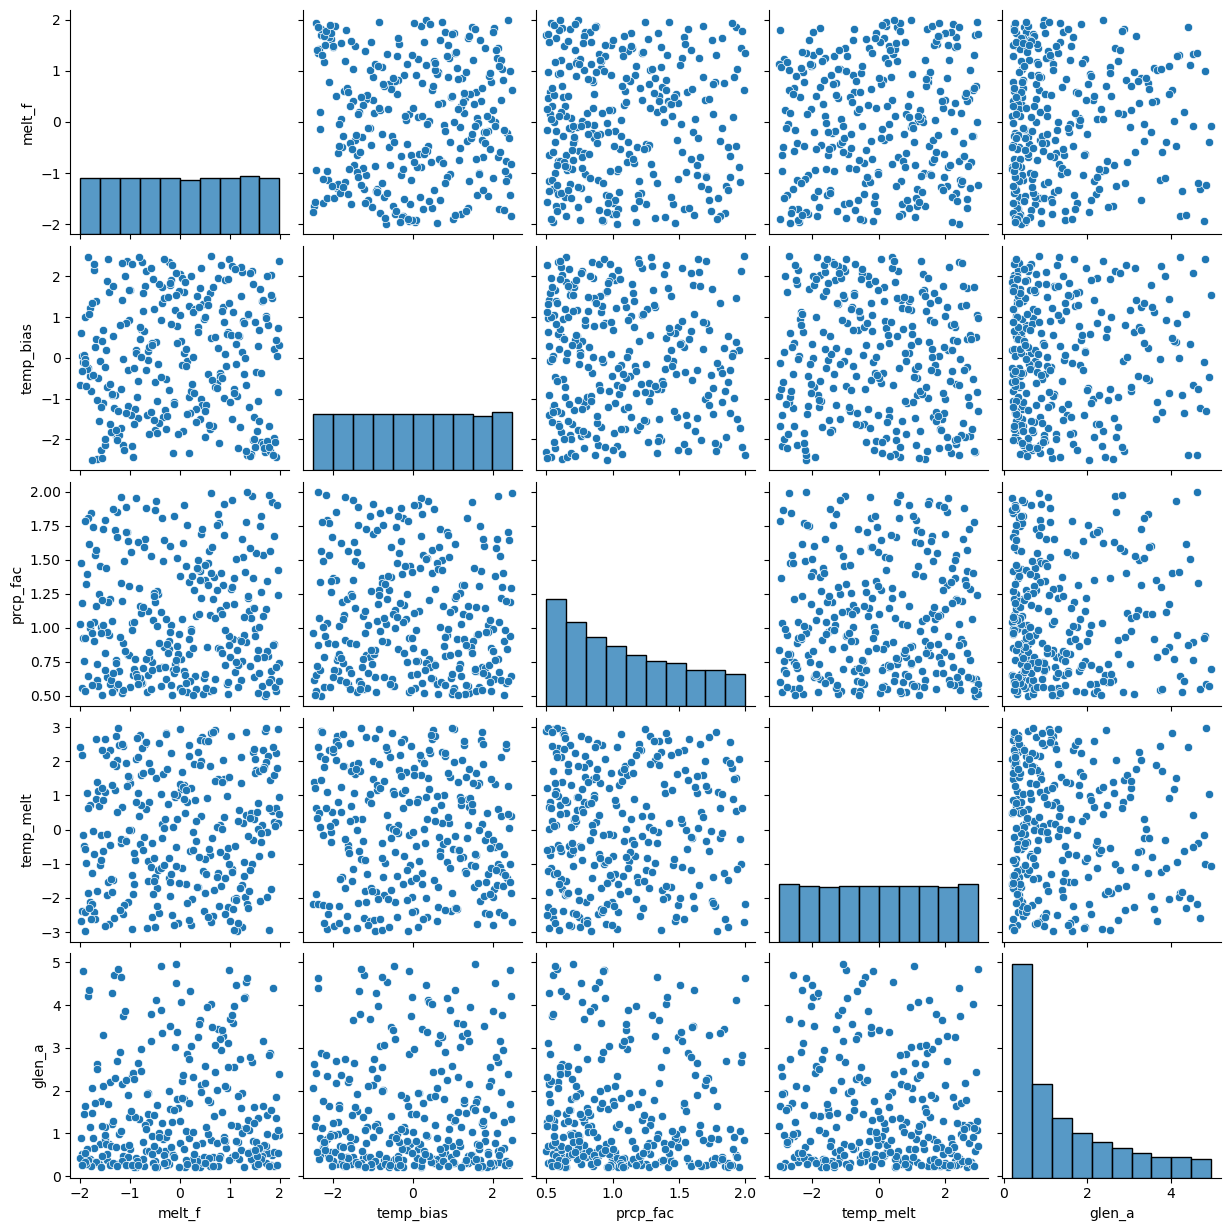

In [35]:
sns.pairplot(df);

In [36]:
df.loc[-1] = None
df = df.sort_index()
df = df.reset_index(drop=True)
df.index.name = 'exp'
df

/tmp/ipykernel_1770978/3607562416.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df.loc[-1] = None


melt_f  temp_bias  prcp_fac  temp_melt    glen_a
exp                                                    
0         NaN        NaN       NaN        NaN       NaN
1    0.422340  -1.006530  1.692046   2.001025  2.129014
2   -0.222516   2.352821  0.844443  -1.413166  0.276735
3    0.445820  -1.165183  1.727352   2.709390  0.774872
4    0.690500  -0.557530  1.372393  -1.765897  1.399388
..        ...        ...       ...        ...       ...
296  1.366163   1.086176  1.229347  -2.299781  0.546946
297 -0.520724  -1.524965  1.235378  -1.497855  1.430720
298 -1.580318  -1.205472  0.962362  -0.900769  0.214041
299  1.505797  -2.192723  0.939824   2.078779  0.603272
300 -0.088527   1.549439  0.699100  -1.064418  4.968703

[301 rows x 5 columns]

In [37]:
df.to_csv('hypercube_oggm_v2.csv')

In [38]:
df

melt_f  temp_bias  prcp_fac  temp_melt    glen_a
exp                                                    
0         NaN        NaN       NaN        NaN       NaN
1    0.422340  -1.006530  1.692046   2.001025  2.129014
2   -0.222516   2.352821  0.844443  -1.413166  0.276735
3    0.445820  -1.165183  1.727352   2.709390  0.774872
4    0.690500  -0.557530  1.372393  -1.765897  1.399388
..        ...        ...       ...        ...       ...
296  1.366163   1.086176  1.229347  -2.299781  0.546946
297 -0.520724  -1.524965  1.235378  -1.497855  1.430720
298 -1.580318  -1.205472  0.962362  -0.900769  0.214041
299  1.505797  -2.192723  0.939824   2.078779  0.603272
300 -0.088527   1.549439  0.699100  -1.064418  4.968703

[301 rows x 5 columns]

In [19]:
# Convert committed mass loss to Gigatons:
# m3 to kg to Gigaton
6.273e13 * 900 * 1e-12

56457.0

In [20]:
56457 / 267

211.4494382022472

In [7]:
sample[:, 0, 0, 0, 0].shape

IndexError: too many indices for array: array is 2-dimensional, but 5 were indexed

Empty DataFrame
Columns: [volume, volume_bsl, area]
Index: []